In [10]:
def rosenbrock_function(x):
    # Рассчитываем функцию Розенброка для двухмерного вектора x
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

In [28]:
import numpy as np


def rosenbrock_function(x):
    # Рассчитываем функцию Розенброка для двухмерного вектора x
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Шаг 1: Определение класса частицы


import numpy as np


class Particle:
    def __init__(self, dimensions):
        self.position = np.random.uniform(-5, 5, dimensions)
        self.velocity = np.random.randn(dimensions)
        self.best_position = np.copy(self.position)
        self.best_loss = float('inf')
        # Инициализация лучшей позиции информатора
        self.best_informant_position = np.copy(self.position)


     # Добавим новый метод для обновления лучшей позиции информатора
    def update_best_informant_position(self, positions):
        best_local_loss = self.best_loss
        for pos in positions:
            # Замените mse_loss на вашу функцию потерь
            local_loss = rosenbrock_function(pos)
            if local_loss < best_local_loss:
                best_local_loss = local_loss
                self.best_informant_position = pos


    def update_velocity(self, global_best_position, w=0.5, c1=1, c2=2):


        inertia = w * self.velocity
        cognitive = c1 * \
            np.random.rand(*self.position.shape) * \
            (self.best_position - self.position)
        social = c2 * np.random.rand(*self.position.shape) * \
            (global_best_position - self.position)
        self.velocity = inertia + cognitive + social

    def update_position(self, bounds=None):
        self.position += self.velocity
        if bounds is not None:
            self.position = np.clip(self.position, bounds[0], bounds[1])

    def evaluate(self, loss_func):
        loss = loss_func(self.position)
        if loss < self.best_loss:
            self.best_loss = loss
            self.best_position = np.copy(self.position)



# Шаг 2: Определение класса роя


# Определение класса роя (Swarm)
class Swarm:
    def __init__(self, dimensions, num_particles=30, num_informants=3):
        self.particles = [Particle(dimensions) for _ in range(num_particles)]
        self.global_best_loss = float('inf')
        # Инициализация global_best_position с позицией первой частицы
        self.global_best_position = np.copy(self.particles[0].position)
        self.num_informants = num_informants
        self.assign_informants()  # Вызываем метод для назначения информаторов

    def assign_informants(self):
        # Простой способ назначения информаторов - случайный выбор
        for particle in self.particles:
            particle.informants = np.random.choice(
                self.particles, self.num_informants, replace=False)
    
    def evaluate_global_best(self):
        for particle in self.particles:
            if particle.best_loss < self.global_best_loss:
                self.global_best_loss = particle.best_loss
                self.global_best_position = particle.best_position

    def update_particles(self, loss_func):
        # Нам нужно сначала обновить глобальное лучшее, если это первая итерация
        self.evaluate_global_best()
        for particle in self.particles:
            # Сначала обновляем лучшую позицию информатора для каждой частицы
            informant_positions = [
                informant.best_position for informant in particle.informants]
            particle.update_best_informant_position(informant_positions)
            # Затем обновляем скорость, учитывая глобальную лучшую позицию
            particle.update_velocity(self.global_best_position)
            # Обновляем позицию и вычисляем новую потерю
            particle.update_position()
            particle.evaluate(loss_func)
            # Для дебага
            print(
                f"Particle Position: {particle.position} Loss: {particle.best_loss}")
        # После обновления всех частиц, снова оцениваем глобальное лучшее
        self.evaluate_global_best()




# Шаг 3: Запуск PSO


def pso_test(num_particles, num_iterations, loss_func, dimensions=2):
    swarm = Swarm(dimensions, num_particles)

    for i in range(num_iterations):
        swarm.update_particles(loss_func)
        print(
            f"Iteration {i+1}/{num_iterations}, Best Loss: {swarm.global_best_loss}")

    return swarm.global_best_position

In [32]:
best_position = pso_test(
    num_particles=100, num_iterations=25, loss_func=rosenbrock_function)
print(f"Best position found by PSO: {best_position}")

Particle Position: [-3.25130026 -0.43402245] Loss: 12129.022854631245
Particle Position: [-3.74927462  0.31221238] Loss: 18914.63963428108
Particle Position: [1.55651631 1.49560127] Loss: 86.26889516521501
Particle Position: [ 0.04091497 -0.80848069] Loss: 66.55491201522374
Particle Position: [-1.47475621 -2.42236268] Loss: 2119.6122393720384
Particle Position: [-3.75059469 -0.89054345] Loss: 22395.260629015975
Particle Position: [-7.30614765  2.17289563] Loss: 262283.6310332013
Particle Position: [-1.93612761 -0.40100793] Loss: 1730.537235425247
Particle Position: [-4.96075676 -0.03358845] Loss: 60761.777741882666
Particle Position: [-5.13073415 -5.14043363] Loss: 99041.36849925578
Particle Position: [-8.89868681 -0.71130219] Loss: 638465.8922885818
Particle Position: [-1.87051422 -0.12450897] Loss: 1321.093620073322
Particle Position: [-1.00723989 -1.23663466] Loss: 510.80423581509086
Particle Position: [-6.63404064 -0.78065947] Loss: 200683.03273063584
Particle Position: [-3.5292942

Particle Position: [0.97750403 3.27234026] Loss: 536.7688386910494
Particle Position: [2.03256478 1.42338801] Loss: 734.355522049435
Particle Position: [-2.57919414  4.14487919] Loss: 641.4976703544335
Particle Position: [0.76216566 2.31425684] Loss: 300.510376718526
Particle Position: [3.29046264 2.05608195] Loss: 7698.39978606165
Particle Position: [-0.57843064  1.90271992] Loss: 248.39709510273605
Particle Position: [4.2991949  2.01059542] Loss: 27145.14898548614
Particle Position: [-3.18315607  3.63168268] Loss: 4243.538675649482
Particle Position: [-0.01606867  1.02828857] Loss: 106.7170395145027
Particle Position: [ 1.041487   -0.29633619] Loss: 190.72648198910443
Particle Position: [-3.4110875  -1.51657436] Loss: 17317.2109252045
Particle Position: [0.25105571 1.62632685] Loss: 244.95094499097561
Particle Position: [-1.24709365  6.58958439] Loss: 2539.5091790843976
Particle Position: [2.31615127 4.47053083] Loss: 81.66048314836137
Particle Position: [-1.8785232   5.29546018] Los

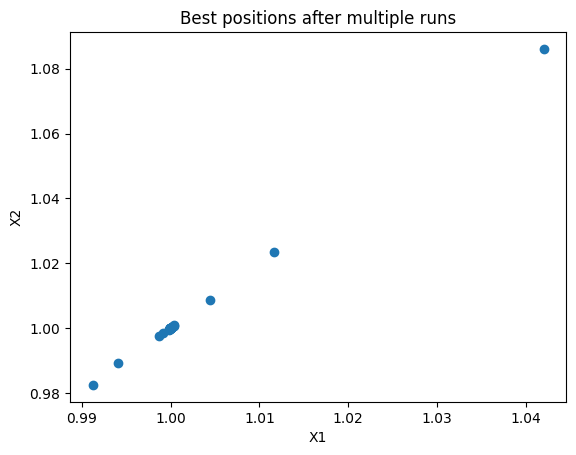

In [33]:
import matplotlib.pyplot as plt

num_runs = 30
best_positions = np.zeros((num_runs, 2))
losses = np.zeros(num_runs)

for i in range(num_runs):
    np.random.seed(i)
    best_positions[i] = pso_test(
        num_particles=30, num_iterations=100, loss_func=rosenbrock_function, dimensions=2)
    losses[i] = rosenbrock_function(best_positions[i])

# Вывод статистики
print(f"Среднее положение: {np.mean(best_positions, axis=0)}")
print(f"Стандартное отклонение положений: {np.std(best_positions, axis=0)}")
print(f"Средний Loss: {np.mean(losses)}")
print(f"Стандартное отклонение Loss: {np.std(losses)}")

# Визуализация результатов
plt.scatter(best_positions[:, 0], best_positions[:, 1])
plt.title('Best positions after multiple runs')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
def pso_test(num_particles, num_iterations, loss_func, dimensions=2):
    swarm = Swarm(dimensions, num_particles)

    for i in range(num_iterations):
        swarm.update_particles(loss_func)

        # Отладочный вывод для каждой частицы
        for particle in swarm.particles:
            print(
                f"Particle Position: {particle.position} Velocity: {particle.velocity} Loss: {loss_func(particle.position)}")

        # Отладочный вывод общих результатов роя
        print(
            f"Iteration {i+1}/{num_iterations}, Best Loss: {swarm.global_best_loss}")

    return swarm.global_best_position